In [9]:
import matplotlib.ticker as ticker
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd
from matplotlib import gridspec
from matplotlib.colors import ListedColormap 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os
import glob
from datetime import datetime, timedelta
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cftime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
import richdem as rd
import rasterio
import matplotlib
import elevation
import matplotlib.ticker as mticker
from cnmaps import get_adm_maps, draw_maps
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def read_data(file):
    ds = xr.open_dataset(file)
    return ds

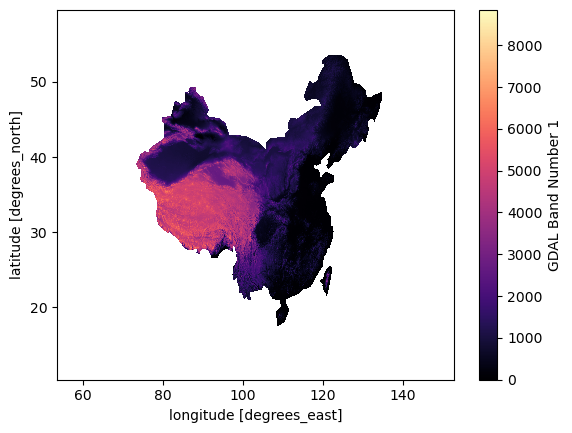

In [3]:
dem_path = r'I:/chinadem_geo.nc'
ds_dem   = xr.open_dataset(dem_path)
ds_dem.Band1.plot(cmap='magma')

In [4]:
dem_data = ds_dem.Band1.data
dem_lon = ds_dem.lon
dem_lat = ds_dem.lat

计算坡度和坡向


In [6]:
#### 坡度
slope = rd.TerrainAttribute(rd.LoadGDAL(dem_path), attrib='slope_riserun')
# ## 坡向
aspect = rd.TerrainAttribute(rd.LoadGDAL(dem_path), attrib='aspect')
aspect[aspect==-9999]=np.nan
aspect_f = np.flip(aspect, axis=0)
slope[slope==-9999]=np.nan
slope_f = np.flip(slope, axis=0)



绘图

In [7]:
matplotlib.rcParams['figure.figsize'] = (8, 5.5)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# # plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置默认字体为新罗马字体
x,y = np.meshgrid(dem_lon,dem_lat)

In [8]:
def set_ax(ax,lon,lat):
    xstep,ystep = 10,5
    box = [np.min(lon),np.max(lon),np.min(lat),np.max(lat)]
    ax.set_xticks(np.linspace(box[0], box[1], xstep),crs=ccrs.PlateCarree())
    ax.set_yticks(np.linspace(box[2], box[3], ystep), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_locator(mticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax.spines[['right','left','top','bottom']].set_linewidth(1.5) 
    ax.spines[['right','left','top','bottom']].set_visible(True) 

设置colorbar


In [10]:
norm = colors.Normalize(vmin=0, vmax=350)
value_range = 256
iceland_colormap = LinearSegmentedColormap.from_list('iceland', 
            ['#ffffff','#CCDBE8', '#6088AB', '#305B80', '#223F59'], N=value_range)

d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons
d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the

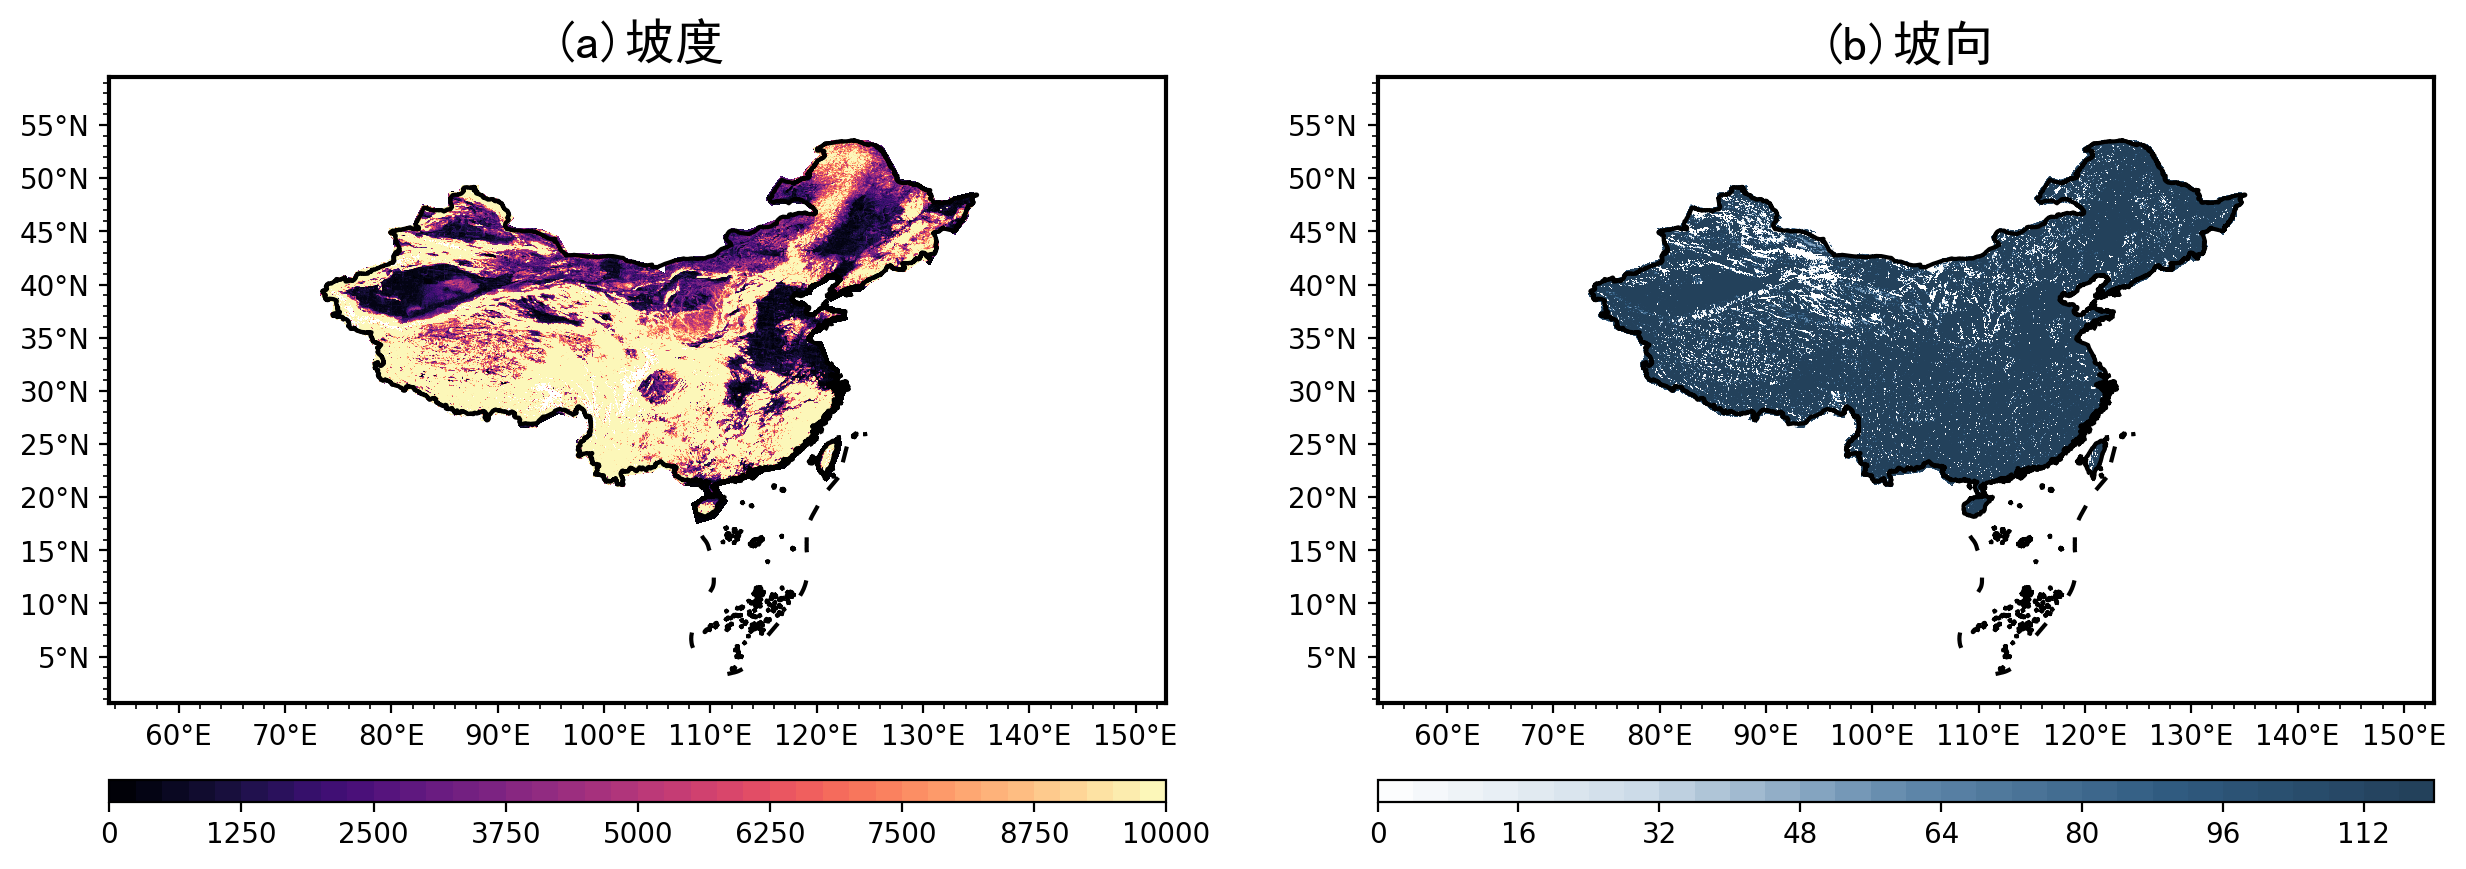

In [11]:
fig, axes = plt.subplots(nrows=1, 
                          ncols=2, dpi=200,
                          figsize=(15, 10), 
                          subplot_kw={'projection': ccrs.PlateCarree()})
# 绘制坡度
ax1 = axes[0]
ax1.set_title('(a)坡度', fontproperties='SimHei',size=18) 
draw_maps(get_adm_maps(level='国'), ax=ax1)
set_ax(ax1,dem_lon,dem_lat)
cb1  = ax1.contourf(x,y, slope_f,cmap='magma', 
              levels = np.linspace(0, 10000,41),
              transform=ccrs.PlateCarree()
              )
plt.colorbar(cb1, orientation='horizontal',

              extend='neither',
              pad=0.05, aspect=50)
# 绘制坡向
ax2 = axes[1]
set_ax(ax2,dem_lon,dem_lat)
cf2 = ax2.contourf(x,y, aspect_f, transform=ccrs.PlateCarree(), 
                    cmap=iceland_colormap,
                    levels=np.linspace(0, 120, 31), 
                    extend='neither')
ax2.set_title('(b)坡向', fontproperties='SimHei',size=18)  # 设置标题字体为中文
draw_maps(get_adm_maps(level='国'), ax=ax2)
plt.colorbar(cf2, orientation='horizontal',
              # label='mm/day',
              pad=0.05, aspect=50)

plt.show()